In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *
import time
#from src.FSW_0010 import FSWSynt
#from src.PXIe_5170R import PXIeSignalAcq

In [6]:
file_name = '../data/mix_cal'
file = file_name + '.h5'
ref = 5.87045 
window     = 5           #length of half of the interval on x axis
step       = 0.0002        #length of a single step during the frequency sweep (GHz)

In [7]:
trigger = dict(
    trigger_type   = 'IMMEDIATE', #'EDGE', 'IMMEDIATE' or 'DIGITAL'
    trigger_source = '0',
    trigger_slope  = 'POSITIVE', #'POSITIVE' or 'NEGATIVE'
    trigger_level  = '0.0',
    trigger_delay  = '0.0'
)

daq =  PXIeSignalAcq("PXI1Slot2", trigger=trigger, records=1, channels=[0,1], sample_rate=5e7, length=1000)
with FSWSynt("COM12") as synt:
    print(synt.get_ID())
    
    for i in range(-window, window):
        freq = ref + i*step
        print(synt.set_freq(freq))
        time.sleep(0.005)
        #print(synt.get_freq(freq))
        print(i)
        daq.acq()  
    
    daq.storage_hdf5(file_name + '.h5')

daq.close()

'daq =  PXIeSignalAcq("PXI1Slot2", trigger=trigger, records=1, channels=[0,1], sample_rate=5e7, length=1000)\nwith FSWSynt("COM12") as synt:\n    print(synt.get_ID())\n    \n    for i in range(-window, window):\n        freq = ref + i*step\n        print(synt.set_freq(freq))\n        time.sleep(0.005)\n        #print(synt.get_freq(freq))\n        print(i)\n        daq.acq()  \n    \n    daq.storage_hdf5(file_name + \'.h5\')\n\ndaq.close()'

In [11]:
I, Q = get_hdf5(file)
print('%d frequencies considered, for each one %d points have been taken.' %(len(I), len(I[0])))

TypeError: object of type 'numpy.float64' has no len()

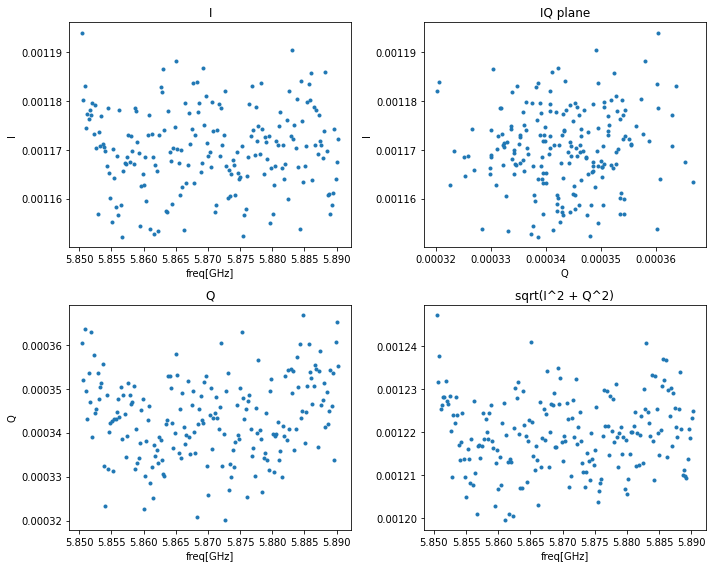

In [10]:
I_mean, Q_mean = get_mean(file)
big_plot_from_array(I_mean, Q_mean, ref, step)

In [ ]:
x = []
for i in range(-int(len(Q_mean)/2), int(len(Q_mean)/2)): 
    x.append(ref + i*step) 
#decide begin and end by looking at the plot
index_max = der_IQ(x, I_mean, Q_mean, begin = 50, end = 150, plot = True)

## visualization of mix_cal files

In [186]:
import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

In [227]:
path = '../data/raw/mix_cal/mixer1/'
#5.345679 #5.380116 #5.638565 #5.869609 
file_name = 'mix_cal_4'
file = path + file_name + '.h5'

Text(0, 0.5, 'Q')

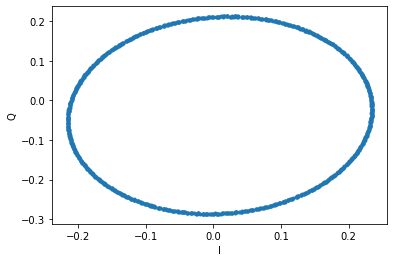

In [228]:
I, Q = get_hdf5(file)
#big_plot_from_array(I, Q, config['ref'], config['step'])
plt.scatter(I[0], Q[0], marker='.')
plt.xlabel('I')
plt.ylabel('Q')

In [207]:
I1, Q1 = get_hdf5(file)

In [209]:
I2, Q2 = get_hdf5(file)

In [211]:
I3, Q3 = get_hdf5(file)

In [213]:
I4, Q4 = get_hdf5(file)

Text(0, 0.5, 'Q')

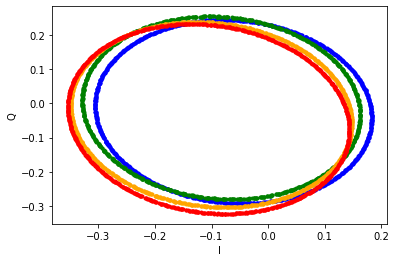

In [214]:
#I, Q = get_hdf5(file)
#big_plot_from_array(I, Q, config['ref'], config['step'])
plt.scatter(I1[0], Q1[0], marker='.', color='b')
plt.scatter(I2[0], Q2[0], marker='.', color='g')
plt.scatter(I3[0], Q3[0], marker='.', color='orange')
plt.scatter(I4[0], Q4[0], marker='.', color='r')
plt.xlabel('I')
plt.ylabel('Q')

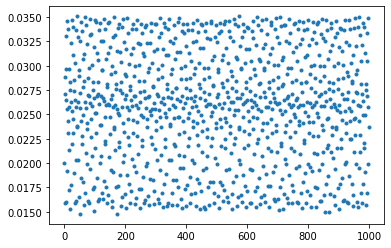

In [166]:
plt.scatter(np.linspace(0,len(Q[0])-1,len(Q[0])),I[0], marker='.')

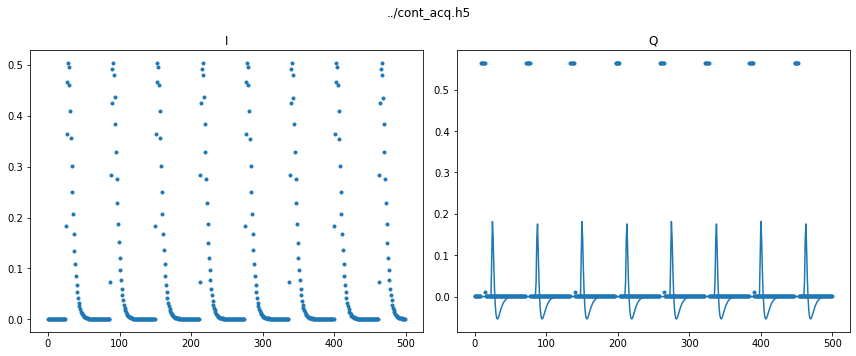

In [43]:
file_name = '../cont_acq'
file = file_name + '.h5'
plot_hdf5(file, i = 0, begin = 0, end = 500)
I, Q = get_hdf5(file)

(0.0, 100.0)

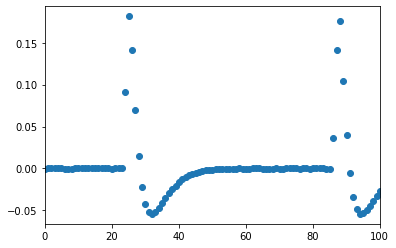

In [46]:
plt.scatter(np.linspace(0, 500, 500), np.gradient(I[0][0:500]))
plt.xlim(0,100)

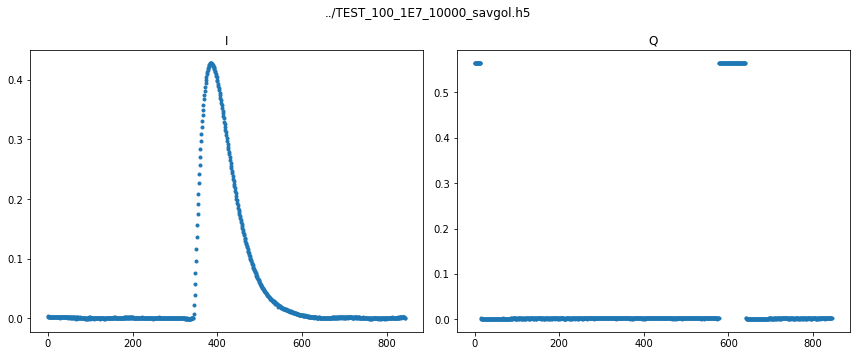

In [11]:
plot_hdf5(file, i = 63)

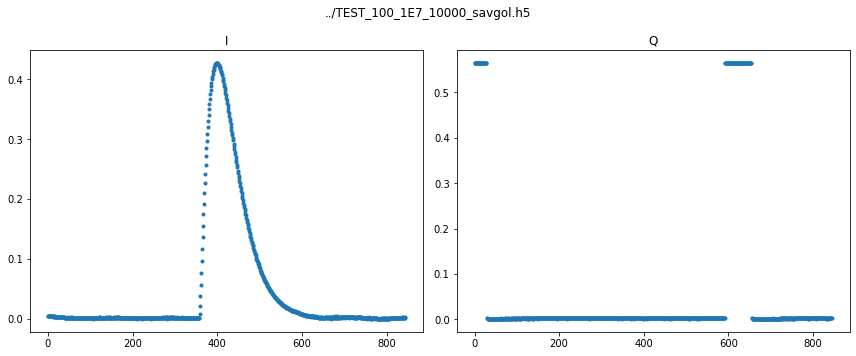

In [12]:
plot_hdf5(file, i = 64)

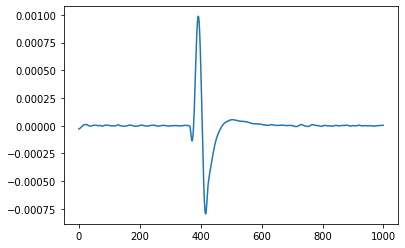

In [31]:
plt.plot(savgol_filter(I[-20], window_length=60, polyorder=4, deriv=2, delta=1, mode='mirror'))

In [17]:
import numpy as np
import os
import h5py

i_matrix_ch0 = np.random.rand(20,1000)*10
q_matrix_ch0 = np.random.rand(20,1000)*10
t = np.linspace(0,19,20)
import os
import h5py
#freq = 5.8
path_to_mixer = '../data/raw/edge_acq/'
files = os.listdir(path_to_mixer)
#diff = 1e10
#the_chosen_one = None
for file in files: 
    if 'config' in file:
        continue
    else:
        with h5py.File(file, 'w') as hdf:
            #print(list(hdf.keys())[0])
            hdf.create_dataset('i_signal_ch0', data=i_matrix_ch0, compression='gzip', compression_opts=9)
            hdf.create_dataset('q_signal_ch0', data=q_matrix_ch0, compression='gzip', compression_opts=9)
            hdf.create_dataset('i_signal_ch1', data=i_matrix_ch0*2, compression='gzip', compression_opts=9)
            hdf.create_dataset('q_signal_ch1', data=q_matrix_ch0*3, compression='gzip', compression_opts=9)
            hdf.create_dataset('timestamp_ch0', data=t, compression='gzip', compression_opts=9)
            hdf.create_dataset('timestamp_ch1', data=t, compression='gzip', compression_opts=9)
            print(file, 'filled')

acq_240422_143207.h5 filled
acq_230422_182805.h5 filled


In [9]:
i_matrix_ch0 = [] #np.linspace(0,100,200)
q_matrix_ch0 = [] #np.linspace(50,500,200)
for i in range(20):
    i_matrix_ch0.append(np.random.normal(loc = 100, scale = 5, size=100))
print(i_matrix_ch0)

[array([ 98.73927272, 101.44524031,  97.76423885, 106.4220018 ,
        93.49671729, 102.25971006, 107.06165374,  98.450464  ,
        96.88649459,  92.70335878, 102.85709531,  97.58107283,
        86.91881613, 100.86901797, 106.30726684,  97.41174315,
        98.23684835,  96.27833168,  91.21076649,  98.2974298 ,
        95.73916451, 105.32864832,  98.8321491 , 114.25853667,
       111.00686904,  99.89788549, 105.62075096, 107.58948152,
        95.61097222,  86.47303111, 100.47708981, 106.21166146,
        94.21313537,  98.54255257, 104.12598151,  95.1755467 ,
       105.98369284,  95.57244465, 103.95475589,  99.34094258,
       105.65155733,  88.20493797,  96.20125234,  96.18479853,
       101.599689  ,  95.33869755,  98.50823569, 100.74389166,
       102.67698536,  97.96581742, 106.8426305 , 101.99375231,
        92.76558148, 112.1021558 ,  98.2342211 ,  95.15169496,
       101.34358799,  97.20923076,  93.4530965 , 100.13782714,
       102.78077109, 105.45537204,  93.82276797, 104.1

In [19]:
import pickle
with open(path_to_mixer + 'config_acq_230422_182805.pkl') as o:
    conf = pickle.load(o)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [25]:
from datetime import datetime
type(datetime.now().strftime("%d-%m-%y %H:%M:%S"))

str